In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix, cohen_kappa_score, precision_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score, f1_score, roc_auc_score, roc_curve
import math
import random
import os
import pkg_resources
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
import whitebox

# Sky View Factor classification
We load the Sky View Factor for all the examined zones and reclassify it to binary in the same way as Gustavsson and Selberg (2018). The threshold used is 0.898.

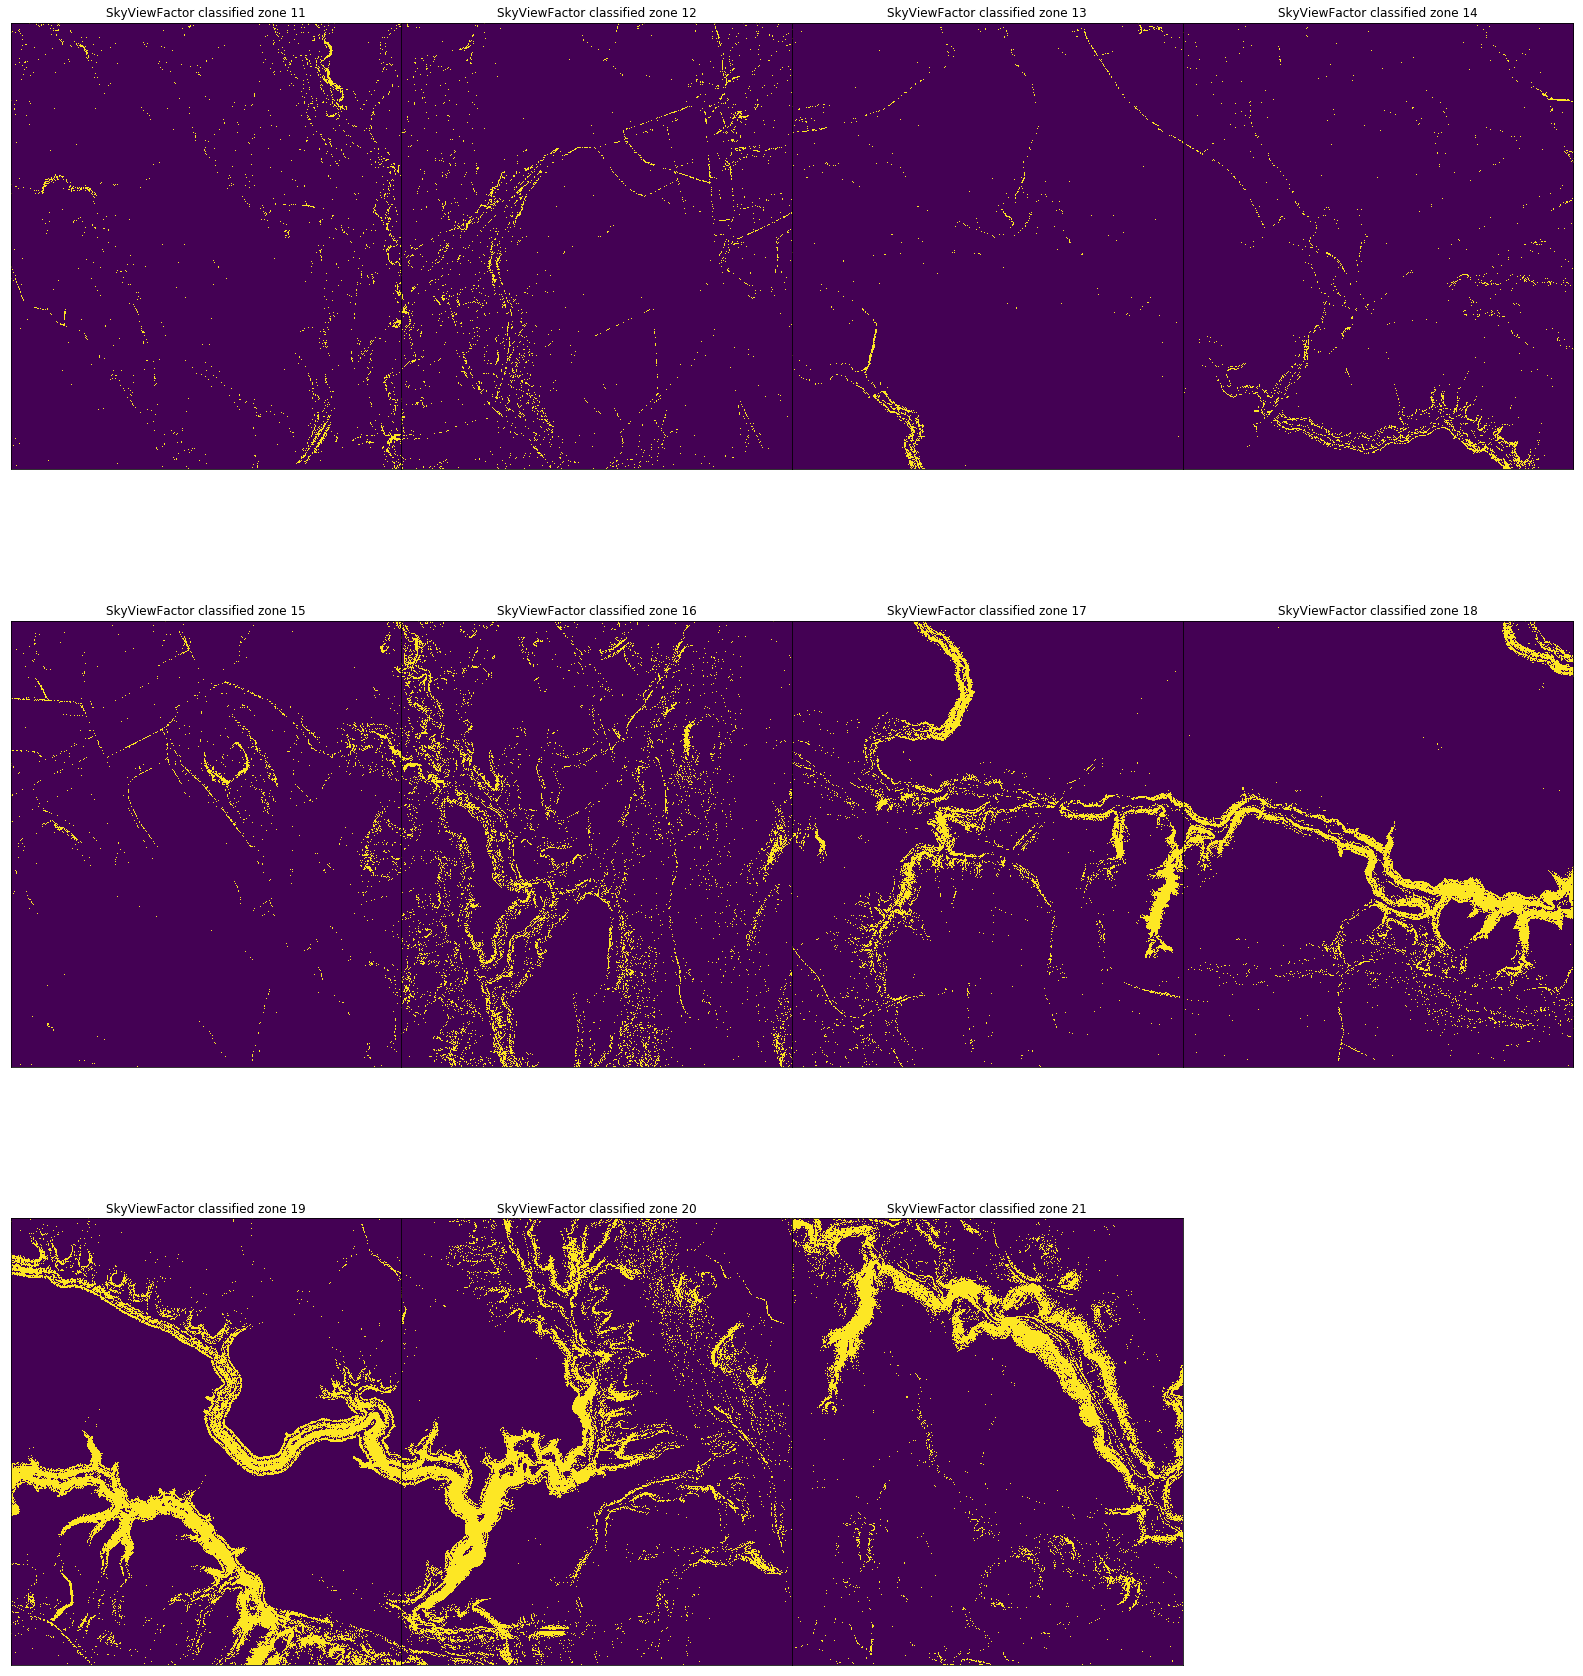

In [3]:
file_list = [f"../Raw_Data_21_zones/SkyViewFactor_{i}.npy" for i in range(11, 22)]

plt.figure(num=None, figsize=(28,32), facecolor='w', edgecolor='k')
ax = [plt.subplot(3,4,i+1) for i in range(11)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0.1)


l = 11
for zone_file in file_list:
    zone = np.load(zone_file)
    classifier = zone.copy()
    for i in range(len(zone)):
        for j in range(len(zone[i])):
            if zone[i][j] < 0.898:
                classifier[i][j] = 1
            else:
                classifier[i][j] = 0
    np.save(f"../recreated/svf/svf_classified_{l}.npy", classifier)
    ax[l-11].title.set_text(f"SkyViewFactor classified zone {l}")
    ax[l-11].imshow(classifier)
    l += 1    

# Sky View Factor results
The results were summarised for the 11 zones. Ditches with a width of 3.5m were used as labels to make the comparason between the models as fair as possible.

In [4]:
classifier_list = [f"../recreated/svf/svf_classified_{i}.npy" for i in range(11, 22)]
labels_list = [f"../Raw_Data_21_zones/Labels3m_{i}.npy" for i in range(11, 22)]
y_pred_all = []
y_test_all = []

for classifier in classifier_list:
    y_pred_all.extend(np.load(classifier).reshape(-1))
for label in labels_list:
    y_test_all.extend(np.load(label).reshape(-1))
    
print("Accuracy score             ", accuracy_score(y_test_all, y_pred_all))
print("Recall score               ", recall_score(y_test_all, y_pred_all))
print("Precision score            ", precision_score(y_test_all, y_pred_all))
precision, recall, threshholds = precision_recall_curve(y_test_all,y_pred_all)
auc_score = auc(recall, precision)
print("Cohen's kappa score        ", cohen_kappa_score(y_test_all, y_pred_all))
print("AUPRC score                ", auc_score)
print("Confusion matrix\n", confusion_matrix(y_test_all, y_pred_all))

Accuracy score              0.930771460797
Recall score                0.129961519333
Precision score             0.0322823013076
Cohen's kappa score         0.0291243925775
AUPRC score                 0.0874409693746
Confusion matrix
 [[80230969  4887915]
 [ 1091599   163057]]


# Impoundment Index classification
We load the Impoundment index for all the examined zones and reclassify it to binary in the same way as Gustavsson and Selberg (2018). The threshold used is 30.

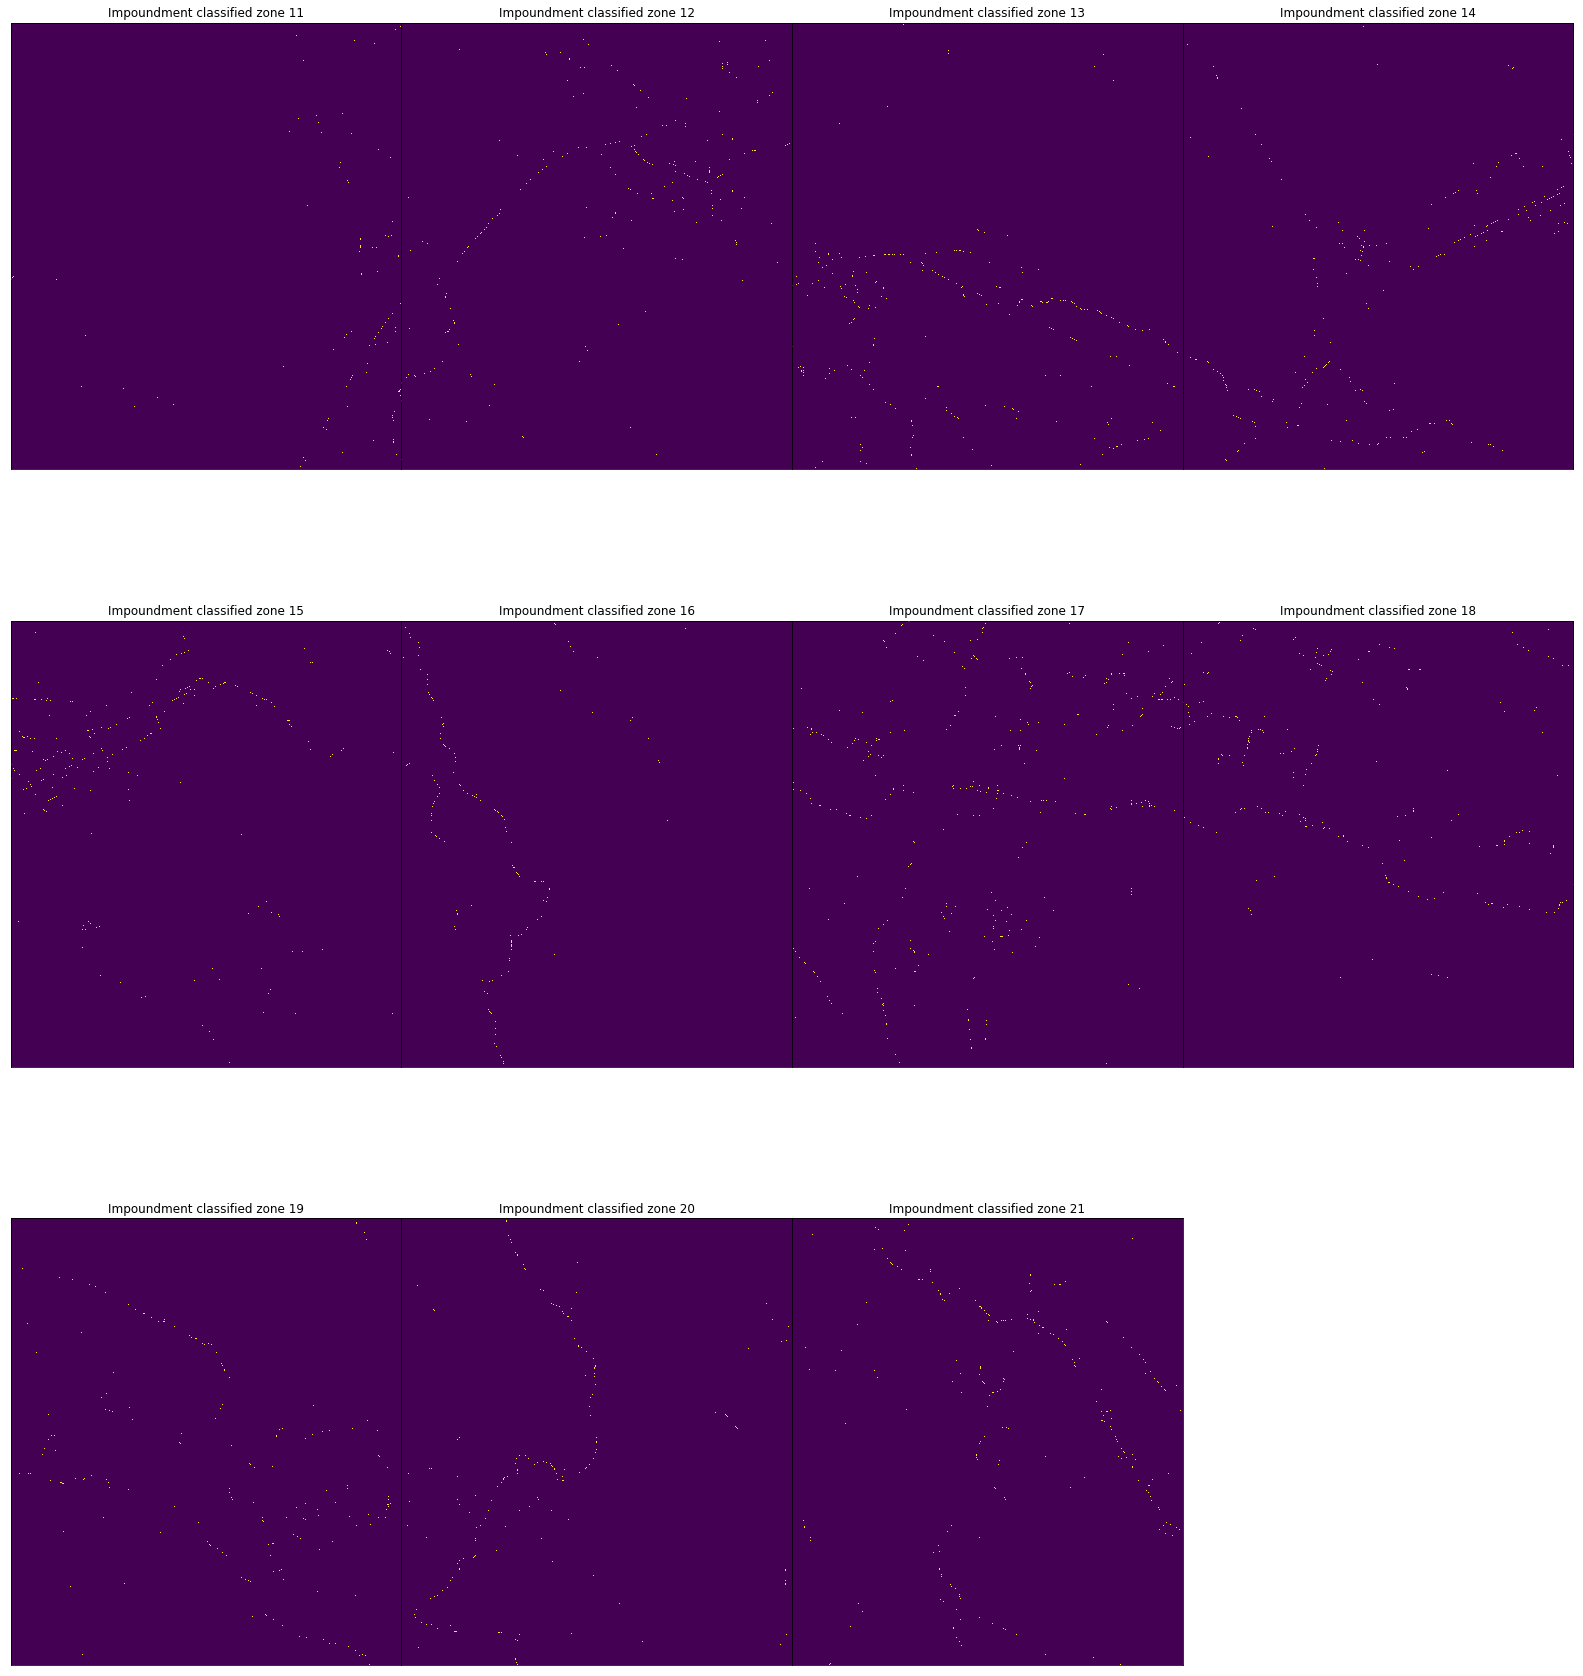

In [6]:
file_list = [f"../Raw_Data_21_zones/imp_uppsala_{i}.npy" for i in range(11, 22)]

plt.figure(num=None, figsize=(28,32), facecolor='w', edgecolor='k')
ax = [plt.subplot(3,4,i+1) for i in range(11)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0.1)

l = 11
for zone_file in file_list:
    zone = np.load(zone_file)
    classifier = zone.copy()
    
    for i in range(len(zone)):
        for j in range(len(zone[i])):
            if zone[i][j] > 30:
                classifier[i][j] = 1
            else:
                classifier[i][j] = 0
    np.save(f"../recreated/imp/imp_classified_{l}.npy", classifier)
    ax[l-11].title.set_text(f"Impoundment classified zone {l}")
    ax[l-11].imshow(classifier)
    l += 1

# Impoundment Index results
The results were summarised for the 11 zones. Ditches with a width of 3.5m were used as labels to make the comparason between the models as fair as possible.

In [5]:
classifier_list = [f"../recreated/imp_test/imp_classified_{i}.npy" for i in range(11, 22)]
labels_list = [f"../Raw_Data_21_zones/Labels3m_{i}.npy" for i in range(11, 22)]
y_pred_all = []
y_test_all = []

for classifier in classifier_list:
    y_pred_all.extend(np.load(classifier).reshape(-1))
for label in labels_list:
    y_test_all.extend(np.load(label).reshape(-1))

print("Accuracy score             ", accuracy_score(y_test_all, y_pred_all))
print("Recall score               ", recall_score(y_test_all, y_pred_all))
print("Precision score            ", precision_score(y_test_all, y_pred_all))
precision, recall, threshholds = precision_recall_curve(y_test_all,y_pred_all)
auc_score = auc(recall, precision)
print("Cohen's kappa score        ", cohen_kappa_score(y_test_all, y_pred_all))
print("AUPRC score                ", auc_score)
print("Confusion matrix\n", confusion_matrix(y_test_all, y_pred_all))

Accuracy score              0.98324861989
Recall score                0.0610470120894
Precision score             0.22174774034
Cohen's kappa score         0.0900307259017
AUPRC score                 0.148216958925
Confusion matrix
 [[84850071   268813]
 [ 1178063    76593]]


# Result graphics example for impoundment

Green indicates a correct ditch prediction.

Red indicates an incorrect ditch prediction.

Blue indicates a missed ditch prediction.

Black indicates a correct non-ditch prediction.

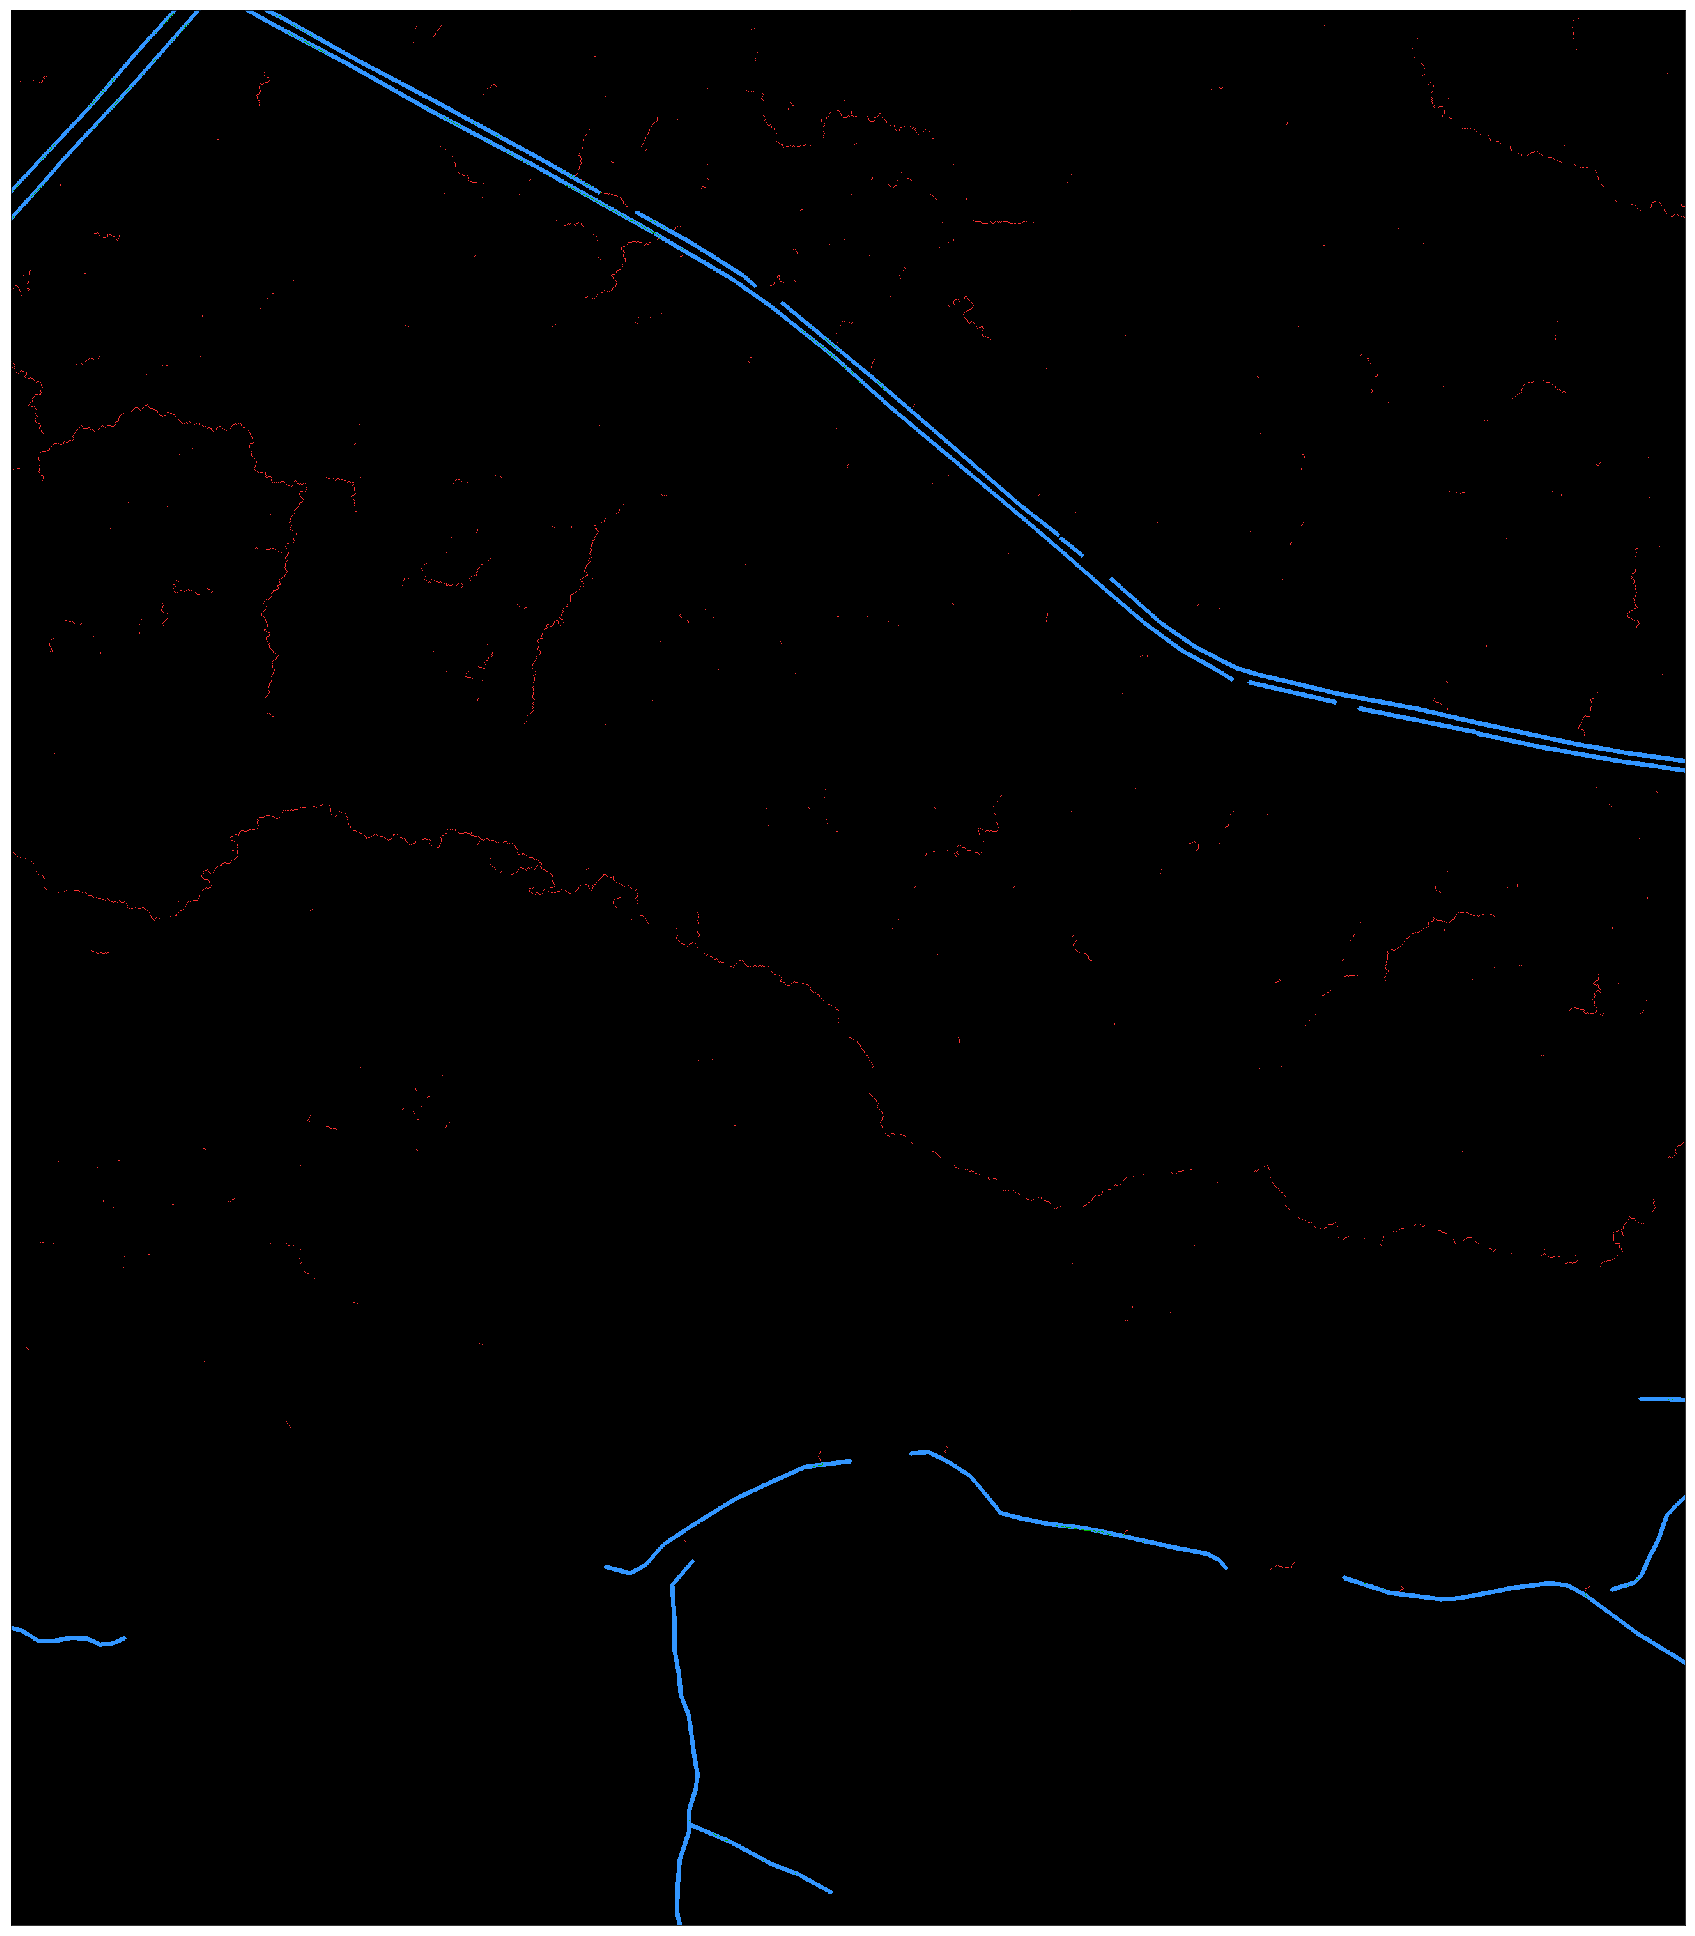

In [14]:
labels = np.load("../Raw_Data_21_zones/Labels3m_18.npy")
results = np.load("../recreated/imp/imp_classified_18.npy")

displayImg = Image.new("RGB", (2620, 2997), "black")
pixels = displayImg.load()
for i in range(displayImg.size[0]):
    for j in range(displayImg.size[1]):
        if labels[j][i] == 1 and results[j][i] == 1:
            pixels[i,j] = (0, 180, 0)
        elif labels[j][i] == 1 and results[j][i] == 0:
            pixels[i,j] = (50, 150, 255)
        elif labels[j][i] == 0 and results[j][i] == 1:
            pixels[i,j] = (255, 50, 50)
            
plt.figure(num=None, figsize=(30,180), facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size':22})
ax = [plt.subplot(1,1,i+1) for i in range(1)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0.04)

ax[0].imshow(displayImg)

#plt.savefig("results.png", format="png", dpi=200, bbox_inches="tight")

In [3]:
imp_test = np.load("../Raw_Data_21_zones/Impoundment_11.npy")

In [3]:
hpmf_test = np.load("../Raw_Data_21_zones/HPMF_11.npy")

In [4]:
np.min(imp_test),np.max(imp_test),np.mean(imp_test)

(0.0, 186.82289, 0.094238922)

In [ ]:
file_list = [f"../Raw_Data_21_zones/HPMF_{i}.npy" for i in range(11, 22)]

for k in range(-7, 2):
    l = 11
    for zone_file in file_list:
        zone = np.load(zone_file)
        classifier = zone.copy()
        for i in range(len(zone)):
            for j in range(len(zone[i])):
                if zone[i][j] < k*0.1:
                    classifier[i][j] = 1
                else:
                    classifier[i][j] = 0
        np.save(f"../recreated/hpmf/hpmf_classified_{l}.npy", classifier)
        l += 1
    classifier_list = [f"../recreated/hpmf/hpmf_classified_{i}.npy" for i in range(11, 22)]
    labels_list = [f"../Raw_Data_21_zones/Labels3m_{i}.npy" for i in range(11, 22)]
    y_pred_all = []
    y_test_all = []

    for classifier in classifier_list:
        y_pred_all.extend(np.load(classifier).reshape(-1))
    for label in labels_list:
        y_test_all.extend(np.load(label).reshape(-1))

    print(f"Cohen's kappa score for HPMF {k*0.1}        ", cohen_kappa_score(y_test_all, y_pred_all))


Cohen's kappa score for -2.0         0.000184511471097
Cohen's kappa score for -1.5         0.000217555810907
Cohen's kappa score for -1.0         0.000371813158881
Cohen's kappa score for -0.5         0.0195590252758
Cohen's kappa score for 0.0         0.0177788651646
Cohen's kappa score for 0.5         7.90436859699e-06
Cohen's kappa score for 1.0         7.13811996955e-07


In [ ]:
file_list = [f"../Raw_Data_21_zones/Impoundment_{i}.npy" for i in range(11, 22)]

for k in range(15, 55, 5):
    l = 11
    for zone_file in file_list:
        zone = np.load(zone_file)
        classifier = zone.copy()
        for i in range(len(zone)):
            for j in range(len(zone[i])):
                if zone[i][j] < k:
                    classifier[i][j] = 1
                else:
                    classifier[i][j] = 0
        np.save(f"../recreated/imp/imp_classified_{l}.npy", classifier)
        l += 1
    classifier_list = [f"../recreated/imp/imp_classified_{i}.npy" for i in range(11, 22)]
    labels_list = [f"../Raw_Data_21_zones/Labels3m_{i}.npy" for i in range(11, 22)]
    y_pred_all = []
    y_test_all = []

    for classifier in classifier_list:
        y_pred_all.extend(np.load(classifier).reshape(-1))
    for label in labels_list:
        y_test_all.extend(np.load(label).reshape(-1))

    print(f"Cohen's kappa score for Impoundment {k}        ", cohen_kappa_score(y_test_all, y_pred_all))

In [ ]:
file_list = [f"../Raw_Data_21_zones/Slope_{i}.npy" for i in range(11, 22)]

for k in range(0, 90, 10):
    l = 11
    for zone_file in file_list:
        zone = np.load(zone_file)
        classifier = zone.copy()
        for i in range(len(zone)):
            for j in range(len(zone[i])):
                if zone[i][j] < k:
                    classifier[i][j] = 1
                else:
                    classifier[i][j] = 0
        np.save(f"../recreated/slope/slope_classified_{l}.npy", classifier)
        l += 1
    classifier_list = [f"../recreated/slope/slope_classified_{i}.npy" for i in range(11, 22)]
    labels_list = [f"../Raw_Data_21_zones/Labels3m_{i}.npy" for i in range(11, 22)]
    y_pred_all = []
    y_test_all = []

    for classifier in classifier_list:
        y_pred_all.extend(np.load(classifier).reshape(-1))
    for label in labels_list:
        y_test_all.extend(np.load(label).reshape(-1))

    print(f"Cohen's kappa score for Slope {k}        ", cohen_kappa_score(y_test_all, y_pred_all))